<a href="https://colab.research.google.com/github/Tumars-web/E-commerce-user-growth-analysis/blob/main/notebooks/01_%E6%8E%A2%E7%B4%A2%E6%80%A7%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import zipfile
import urllib.request

url = 'https://github.com/Tumars-web/E-commerce-user-growth-analysis/raw/main/cleaned_data.csv.zip'
zip_path = 'cleaned_data.zip'

# 下载压缩包
urllib.request.urlretrieve(url, zip_path)

# 解压缩
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# 读取 CSV
df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("数据加载成功！")
df.head()


数据加载成功！


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


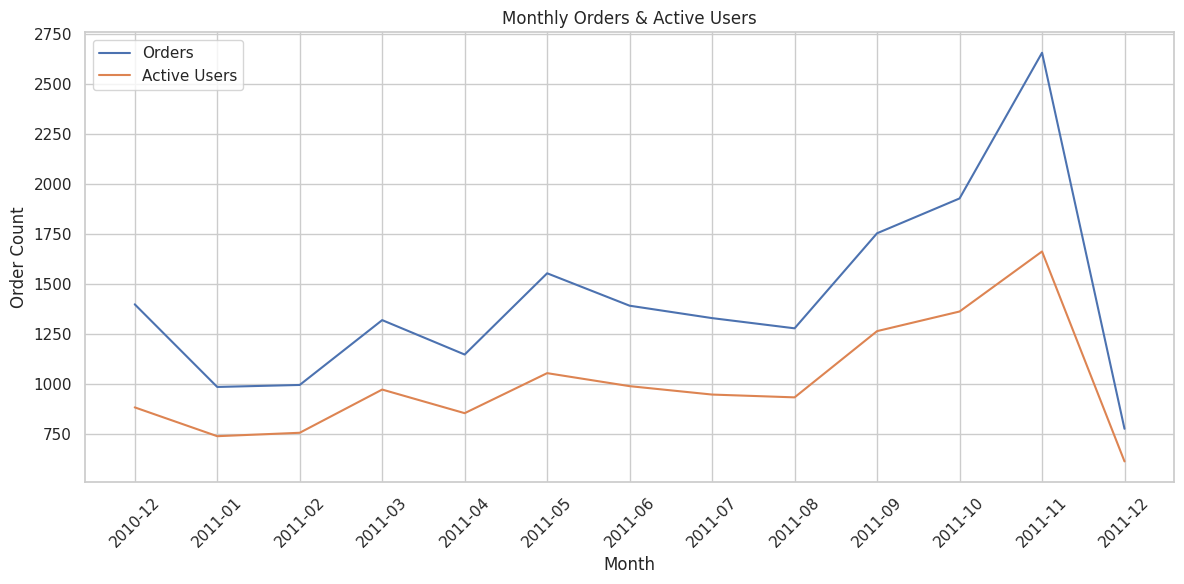

In [10]:
#基础分析（Basic_EDA)
#分析目标：
#每月订单数量变化/每月活跃用户数量变化/每月平均下单次数，平均下单金额

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图表风格
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# 读取清洗后的数据
df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 添加月份列
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# 每月订单数量
monthly_orders = df.groupby('InvoiceMonth')['InvoiceNo'].nunique().reset_index()
monthly_orders.columns = ['Month', 'Order Count']

# 每月活跃用户数量
monthly_users = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
monthly_users.columns = ['Month', 'Active Users']

# 合并订单数 + 用户数
monthly_summary = pd.merge(monthly_orders, monthly_users, on='Month')

# 绘图：订单数与用户数
fig, ax1 = plt.subplots()
sns.lineplot(data=monthly_summary, x='Month', y='Order Count', label='Orders', ax=ax1)
sns.lineplot(data=monthly_summary, x='Month', y='Active Users', label='Active Users', ax=ax1)
plt.xticks(rotation=45)
plt.title('Monthly Orders & Active Users')
plt.tight_layout()
plt.show()


      Month  OrderCount  ActiveUsers  AvgOrdersPerUser  AvgAmountPerUser
0   2010-12        1400          885          1.581921        647.134339
1   2011-01         987          741          1.331984        768.481835
2   2011-02         997          758          1.315303        589.890963
3   2011-03        1321          974          1.356263        611.397084
4   2011-04        1149          856          1.342290        548.131263
5   2011-05        1555         1056          1.472538        642.608485
6   2011-06        1393          991          1.405651        667.218658
7   2011-07        1331          949          1.402529        632.340370
8   2011-08        1280          935          1.368984        690.207380
9   2011-09        1755         1266          1.386256        752.636953
10  2011-10        1929         1364          1.414223        761.963922
11  2011-11        2657         1664          1.596755        698.207560
12  2011-12         778          615          1.265

/tmp/ipython-input-13-3025084588.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
/tmp/ipython-input-13-3025084588.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
/tmp/ipython-input-13-3025084588.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
/tmp/ipython-input-13-3025084588.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
/tmp/ipython-input-13-3025084588.py:60: UserWarn

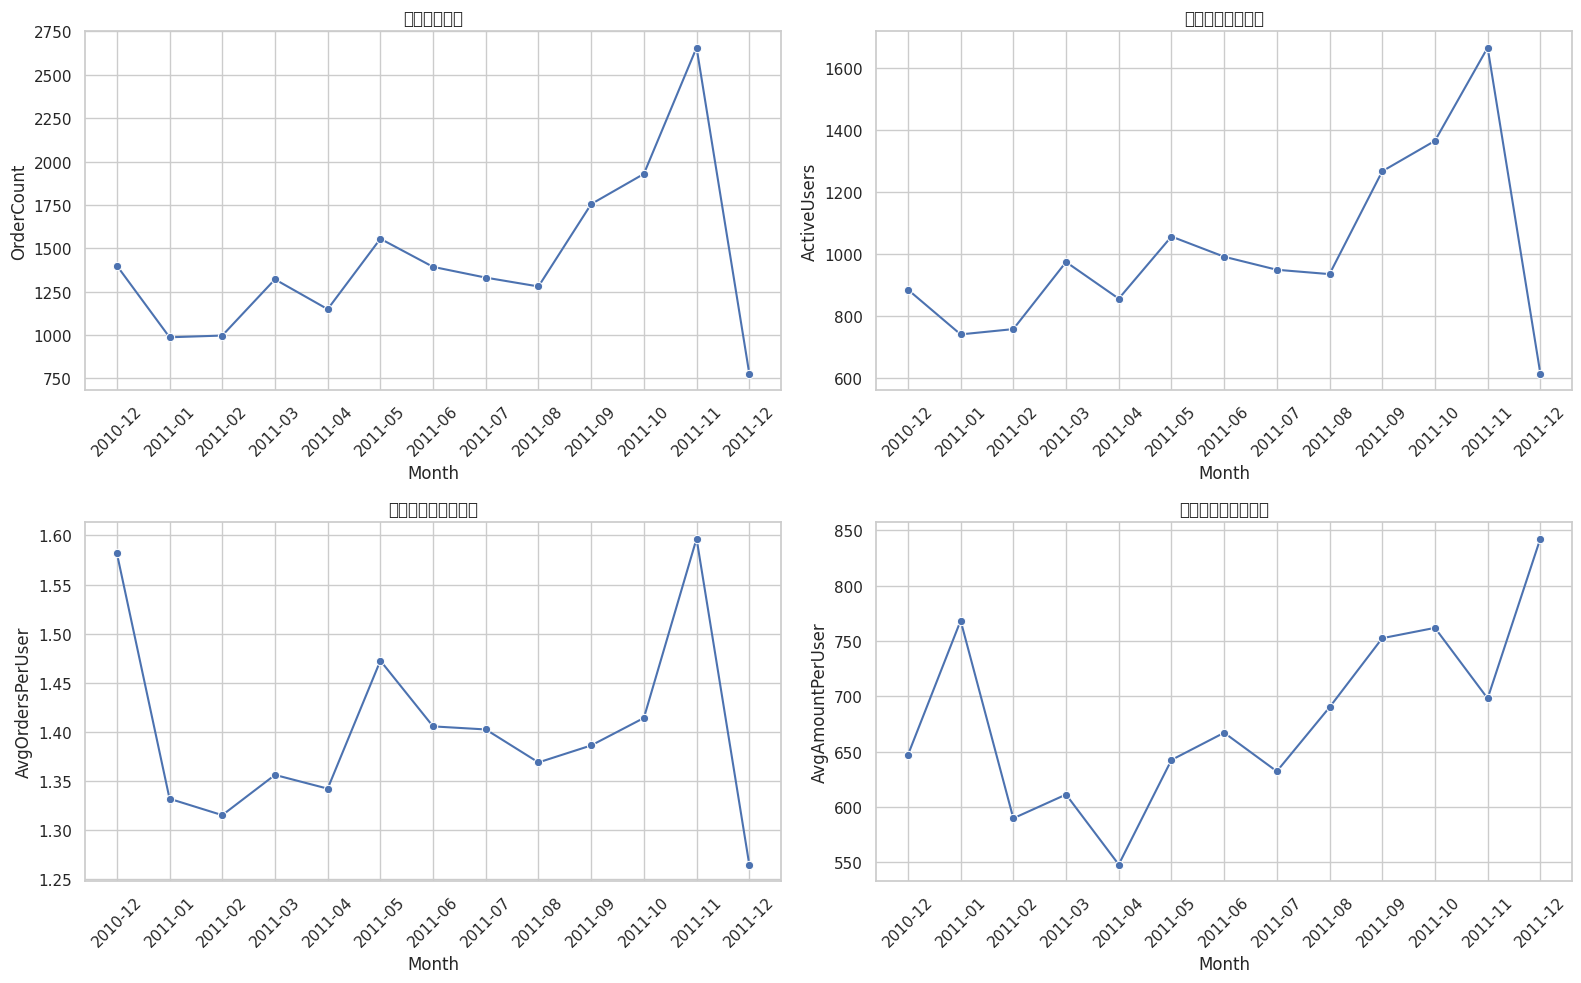

In [13]:
#进阶分析(Advanced_EDA)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14,7)

# 生成月份字段
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# 每月订单数量（去重订单号计数）
monthly_orders = df.groupby('InvoiceMonth')['InvoiceNo'].nunique().reset_index()
monthly_orders.columns = ['Month', 'OrderCount']

# 每月活跃用户数（去重用户数）
monthly_users = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
monthly_users.columns = ['Month', 'ActiveUsers']

# 计算每月每用户的平均下单次数
monthly_order_user = df.groupby(['InvoiceMonth', 'CustomerID'])['InvoiceNo'].nunique().reset_index()
monthly_avg_orders_per_user = monthly_order_user.groupby('InvoiceMonth')['InvoiceNo'].mean().reset_index()
monthly_avg_orders_per_user.columns = ['Month', 'AvgOrdersPerUser']

# 每月每用户平均消费金额
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monthly_user_amount = df.groupby(['InvoiceMonth', 'CustomerID'])['TotalPrice'].sum().reset_index()
monthly_avg_amount_per_user = monthly_user_amount.groupby('InvoiceMonth')['TotalPrice'].mean().reset_index()
monthly_avg_amount_per_user.columns = ['Month', 'AvgAmountPerUser']

# 合并所有月度指标
monthly_summary = monthly_orders.merge(monthly_users, on='Month')\
                                .merge(monthly_avg_orders_per_user, on='Month')\
                                .merge(monthly_avg_amount_per_user, on='Month')

print(monthly_summary)

# 绘图

fig, axes = plt.subplots(2, 2, figsize=(16,10))

# 每月订单数
sns.lineplot(data=monthly_summary, x='Month', y='OrderCount', ax=axes[0,0], marker='o')
axes[0,0].set_title('每月订单数量')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# 每月活跃用户数
sns.lineplot(data=monthly_summary, x='Month', y='ActiveUsers', ax=axes[0,1], marker='o')
axes[0,1].set_title('每月活跃用户数量')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# 每用户平均下单次数
sns.lineplot(data=monthly_summary, x='Month', y='AvgOrdersPerUser', ax=axes[1,0], marker='o')
axes[1,0].set_title('每用户平均下单次数')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)

# 每用户平均消费金额
sns.lineplot(data=monthly_summary, x='Month', y='AvgAmountPerUser', ax=axes[1,1], marker='o')
axes[1,1].set_title('每用户平均消费金额')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
